In [1]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf
#import matplotlib.pyplot as plt

In [4]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
#from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

Unzip the airlab file 

In [5]:
local_zip = '/content/drive/MyDrive/airlab.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import splitfolders
input_folder = '/content/airlab/2DS_rospla'

splitfolders.ratio(input_folder, output='2DS_rospla', seed=42, ratio=(.7, .2, .1), group_prefix=None)


Copying files: 4190 files [00:00, 9259.43 files/s]


In [8]:
#Import Libraries

import sys
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
#from keras.optimizers import Adam
import itertools  

In [9]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_data_path = '/content/2DS_rospla/train'
valid_data_path = '/content/2DS_rospla/val'
test_data_path = '/content/2DS_rospla/test'

In [12]:
# Define Input Parameters
shape = (224, 224)
channel = (3, )
input_size = shape + channel

#batch size
batch_size = 32

#ImageDataGenerator which is used for generating images using Image Augmentation techniques dynamically during training.

# Use the Image Data Generator to import the images from the dataset
# Make sure you provide the same target size as initialied for the image size

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen =  ImageDataGenerator(rescale = 1. / 255)
                                  

train_gen = train_datagen.flow_from_directory('/content/2DS_rospla/train',
                                            target_size = shape,
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

val_gen = test_datagen.flow_from_directory('/content/2DS_rospla/val',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)

test_gen= test_datagen.flow_from_directory('/content/2DS_rospla/test',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)


Found 2858 images belonging to 7 classes.
Found 821 images belonging to 7 classes.
Found 421 images belonging to 7 classes.


In [15]:
#train_datagen = ImageDataGenerator(zoom_range = 0.4)
#train_gen = train_datagen.flow_from_directory(train_data_path,
                                                    #target_size=(224, 224),
                                                    #batch_size=32,
                                                    #class_mode='categorical', shuffle=True)

#test_datagen = ImageDataGenerator()
#val_gen = test_datagen.flow_from_directory(valid_data_path,
                                                    #target_size=(224, 224),
                                                    #batch_size=32,
                                                    #class_mode='categorical', shuffle=True)


#test_gen = test_datagen.flow_from_directory(test_data_path,
                                                    #target_size=(224, 224),
                                                    #batch_size=32,
                                                    #class_mode='categorical', shuffle=False)



Found 2858 images belonging to 7 classes.
Found 821 images belonging to 7 classes.
Found 421 images belonging to 7 classes.


In [14]:
num_class = test_gen.num_classes
label_class = train_gen.class_indices

print(label_class)

{'2D-S Other (OT)': 0, 'Aggregate (AG)': 1, 'Bullet Rosette (BR)': 2, 'Columnar Crystal (CC)': 3, 'Compact particle (CP)': 4, 'Planar crystal (PC)': 5, 'Quasi-sphere (QS)': 6}


Bar plot to show the train images in each class of 2D-S

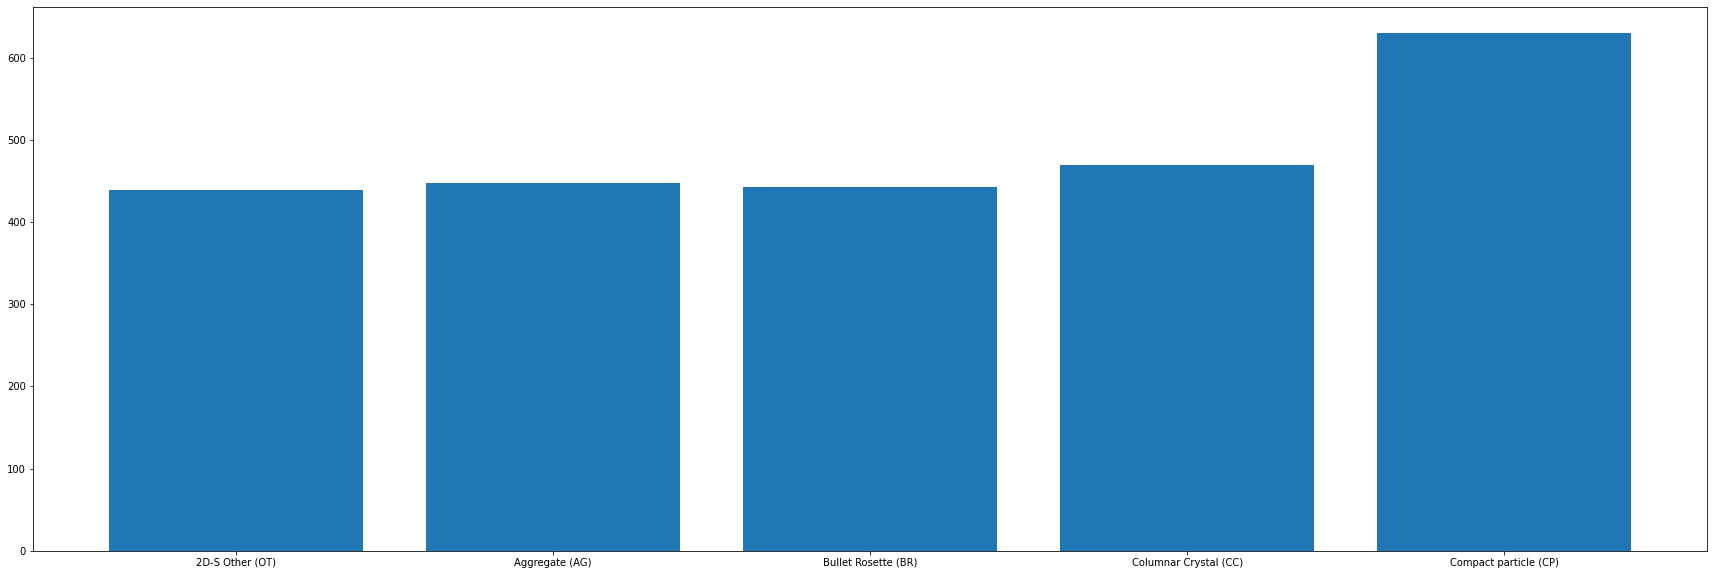

In [15]:
from sklearn.utils.class_weight import compute_class_weight
cls_train = train_gen.classes
from collections import OrderedDict
classes = list(train_gen.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_train, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(5):
    num_values.append(valdict[i])
plt.figure(figsize=(30,10))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()   

Bar plot to show the test images of the 2D-S

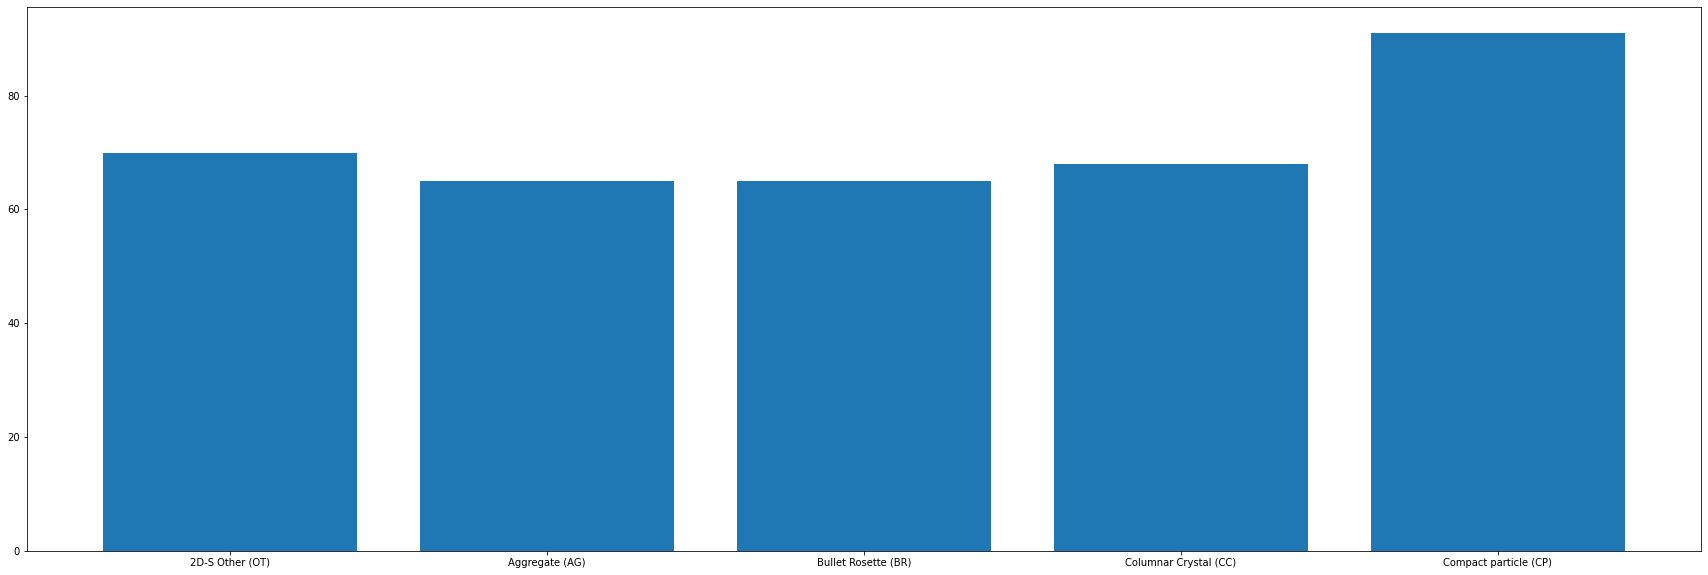

In [16]:
from sklearn.utils.class_weight import compute_class_weight
cls_test = test_gen.classes
from collections import OrderedDict
classes = list(test_gen.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_test, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(5):
    num_values.append(valdict[i])
plt.figure(figsize=(30,10))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()   

In [17]:
#Check the training set (with batch of 10 as defined above)
imgs, labels = next(train_gen)


In [20]:
#Images Classes with index
class_names = train_gen.class_indices
print(class_names)


{'2D-S Other (OT)': 0, 'Aggregate (AG)': 1, 'Bullet Rosette (BR)': 2, 'Columnar Crystal (CC)': 3, 'Compact particle (CP)': 4, 'Planar crystal (PC)': 5, 'Quasi-sphere (QS)': 6}


In [18]:
batch_size = 32
img_height = 224
img_width = 224

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [20]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer  
#Here we use softmax activation function which makes our model output of seven classes
model.add(keras.layers.Dense(7,activation='softmax'))

In [21]:
#Get summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)     

Compiling the model

In [22]:
#model = get_model(input_shape=(180, 180, 3), num_classes=5)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# fit the model
# Run the cell. 

In [23]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 20s 410ms/step - loss: 1.7247 - accuracy: 0.3883 - val_loss: 1.7825 - val_accuracy: 0.2422
Epoch 2/25
20/20 [==============================] - 7s 348ms/step - loss: 1.1036 - accuracy: 0.6187 - val_loss: 1.0667 - val_accuracy: 0.6328
Epoch 3/25
20/20 [==============================] - 7s 375ms/step - loss: 0.8434 - accuracy: 0.7188 - val_loss: 0.8958 - val_accuracy: 0.6797
Epoch 4/25
20/20 [==============================] - 7s 348ms/step - loss: 0.7173 - accuracy: 0.7516 - val_loss: 0.6093 - val_accuracy: 0.7656
Epoch 5/25
20/20 [==============================] - 7s 344ms/step - loss: 0.6438 - accuracy: 0.7719 - val_loss: 0.5182 - val_accuracy: 0.8594
Epoch 6/25
20/20 [==============================] - 7s 346ms/step - loss: 0.5419 - accuracy: 0.8109 - val_loss: 0.5098 - val_accuracy: 0.8438
Epoch 7/25
20/20 [==============================] - 7s 342ms/step - loss: 0.4568 - accuracy: 0.8391 - val_loss: 0.5398 - val_accuracy: 0.8438
Epoch

In [24]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 82.42%
[INFO] Loss:  0.5541802644729614


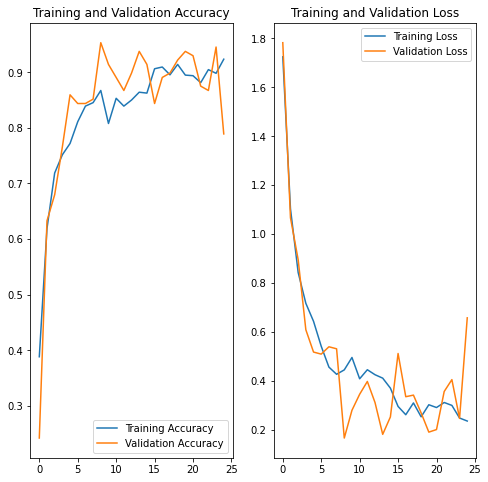

In [25]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###################################################

In [27]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)

['2D-S Other (OT)', 'Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Planar crystal (PC)', 'Quasi-sphere (QS)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


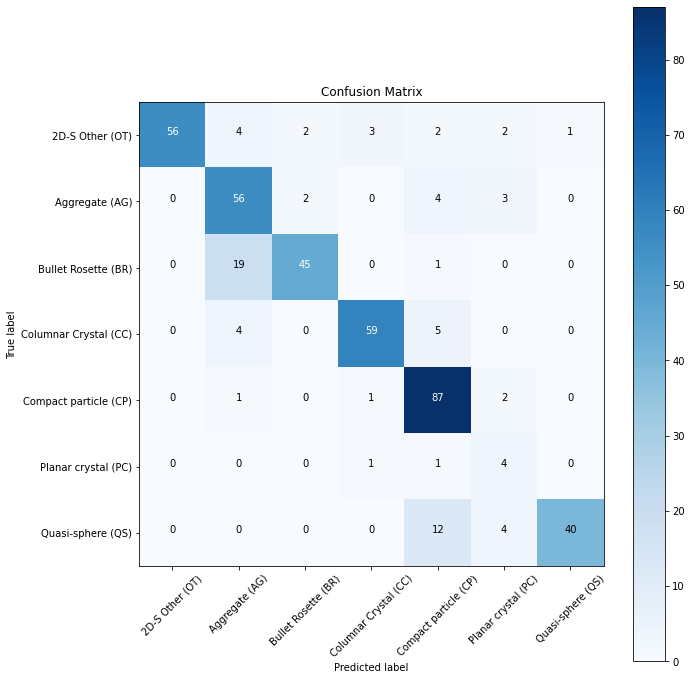

In [28]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [29]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       1.00      0.80      0.89        70
       Aggregate (AG)       0.67      0.86      0.75        65
  Bullet Rosette (BR)       0.92      0.69      0.79        65
Columnar Crystal (CC)       0.92      0.87      0.89        68
Compact particle (CP)       0.78      0.96      0.86        91
  Planar crystal (PC)       0.27      0.67      0.38         6
    Quasi-sphere (QS)       0.98      0.71      0.82        56

             accuracy                           0.82       421
            macro avg       0.79      0.79      0.77       421
         weighted avg       0.86      0.82      0.83       421



In [30]:
#Save the model
model.save("CNN_2DS1.hdf5")

1)VGG16(2DS_rospla)

In [31]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [32]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [33]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [34]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [35]:
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [36]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [38]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 11s 402ms/step - loss: 1.4869 - accuracy: 0.5547 - val_loss: 0.1394 - val_accuracy: 0.9453
Epoch 2/25
20/20 [==============================] - 8s 399ms/step - loss: 0.6275 - accuracy: 0.7797 - val_loss: 0.3149 - val_accuracy: 0.9141
Epoch 3/25
20/20 [==============================] - 8s 406ms/step - loss: 0.4399 - accuracy: 0.8531 - val_loss: 0.3048 - val_accuracy: 0.9141
Epoch 4/25
20/20 [==============================] - 8s 399ms/step - loss: 0.4529 - accuracy: 0.8391 - val_loss: 0.1228 - val_accuracy: 0.9453
Epoch 5/25
20/20 [==============================] - 9s 453ms/step - loss: 0.3601 - accuracy: 0.8738 - val_loss: 0.1474 - val_accuracy: 0.9531
Epoch 6/25
20/20 [==============================] - 8s 389ms/step - loss: 0.2893 - accuracy: 0.8981 - val_loss: 0.4498 - val_accuracy: 0.8359
Epoch 7/25
20/20 [==============================] - 8s 382ms/step - loss: 0.3106 - accuracy: 0.8964 - val_loss: 0.2384 - val_accuracy: 0.9062
Epoch

In [39]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 90.02%
[INFO] Loss:  0.31081146001815796


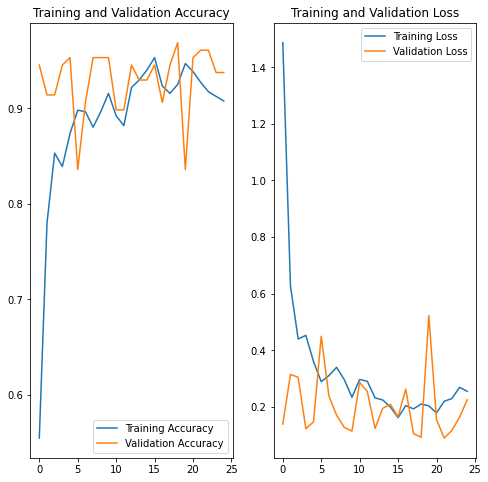

In [40]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [42]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

# print(target_names)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


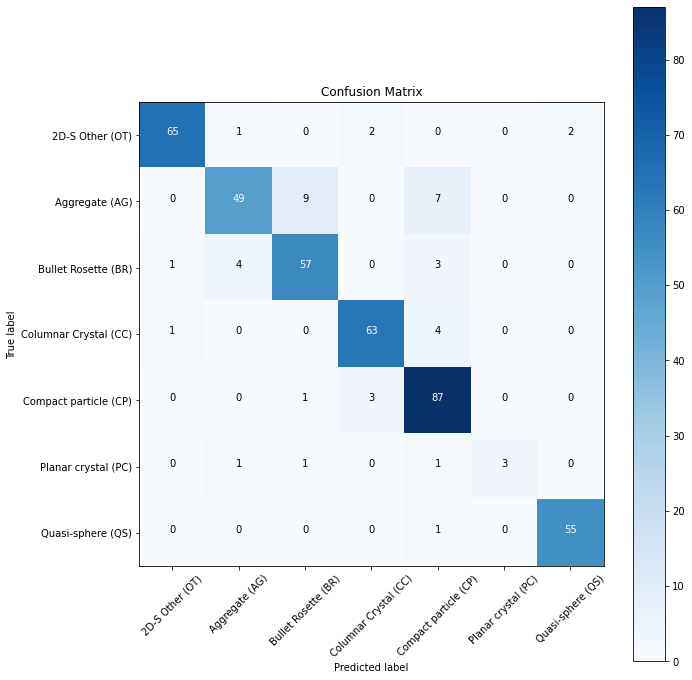

In [43]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [44]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.97      0.93      0.95        70
       Aggregate (AG)       0.89      0.75      0.82        65
  Bullet Rosette (BR)       0.84      0.88      0.86        65
Columnar Crystal (CC)       0.93      0.93      0.93        68
Compact particle (CP)       0.84      0.96      0.90        91
  Planar crystal (PC)       1.00      0.50      0.67         6
    Quasi-sphere (QS)       0.96      0.98      0.97        56

             accuracy                           0.90       421
            macro avg       0.92      0.85      0.87       421
         weighted avg       0.90      0.90      0.90       421



In [46]:
#Save the model
model.save("VGG162DS1.hdf5")

VGG19

In [47]:
from tensorflow.keras.applications.vgg19 import VGG19

In [48]:
# Import the VGG19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [49]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [50]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [51]:
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [52]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [53]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [54]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 9s 421ms/step - loss: 1.4794 - accuracy: 0.5372 - val_loss: 0.1405 - val_accuracy: 0.9609
Epoch 2/25
20/20 [==============================] - 8s 417ms/step - loss: 0.5980 - accuracy: 0.7969 - val_loss: 0.2612 - val_accuracy: 0.9297
Epoch 3/25
20/20 [==============================] - 8s 417ms/step - loss: 0.4562 - accuracy: 0.8375 - val_loss: 0.2921 - val_accuracy: 0.9219
Epoch 4/25
20/20 [==============================] - 9s 420ms/step - loss: 0.3428 - accuracy: 0.8797 - val_loss: 0.3062 - val_accuracy: 0.9297
Epoch 5/25
20/20 [==============================] - 8s 403ms/step - loss: 0.3364 - accuracy: 0.8770 - val_loss: 0.0711 - val_accuracy: 0.9688
Epoch 6/25
20/20 [==============================] - 8s 414ms/step - loss: 0.3949 - accuracy: 0.8531 - val_loss: 0.1332 - val_accuracy: 0.9609
Epoch 7/25
20/20 [==============================] - 8s 413ms/step - loss: 0.3382 - accuracy: 0.8859 - val_loss: 0.2142 - val_accuracy: 0.9453
Epoch 

In [55]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 16)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 90.74%
[INFO] Loss:  0.3314490020275116


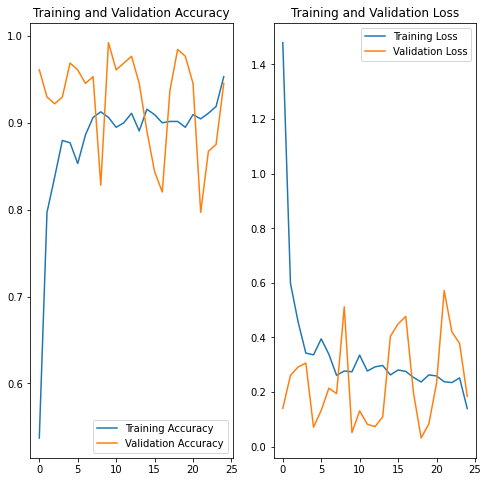

In [56]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [57]:
##################################################################################################
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [58]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

# print(target_names)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


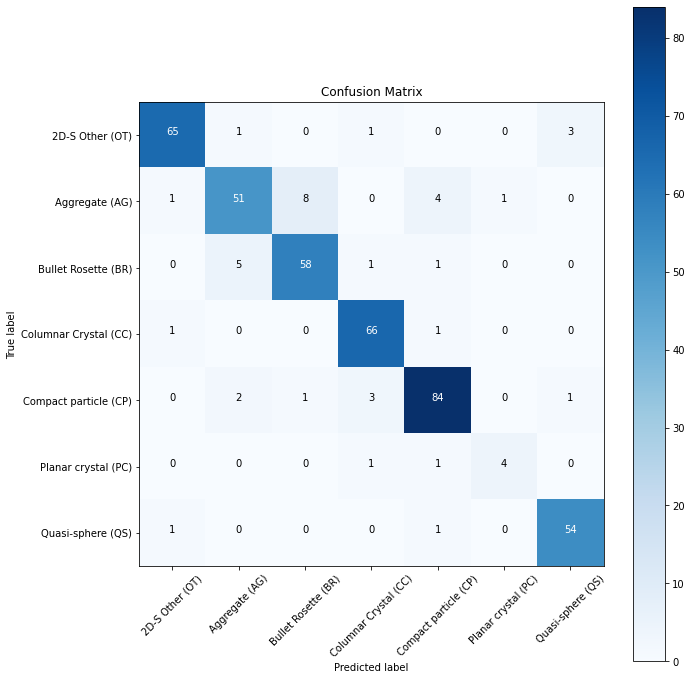

In [59]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [60]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.96      0.93      0.94        70
       Aggregate (AG)       0.86      0.78      0.82        65
  Bullet Rosette (BR)       0.87      0.89      0.88        65
Columnar Crystal (CC)       0.92      0.97      0.94        68
Compact particle (CP)       0.91      0.92      0.92        91
  Planar crystal (PC)       0.80      0.67      0.73         6
    Quasi-sphere (QS)       0.93      0.96      0.95        56

             accuracy                           0.91       421
            macro avg       0.89      0.88      0.88       421
         weighted avg       0.91      0.91      0.91       421



In [61]:
#Save the model
model.save("vgg192DS1.hdf5")


3)ResNet50

In [62]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [63]:
# Import the restnet50 library as shown below and add preprocessing layer to the front of restnet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [64]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [65]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [66]:
prediction = Dense(7, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [67]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [68]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [69]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 12s 419ms/step - loss: 5.7230 - accuracy: 0.3422 - val_loss: 1.5867 - val_accuracy: 0.4531
Epoch 2/25
20/20 [==============================] - 8s 376ms/step - loss: 1.8683 - accuracy: 0.6391 - val_loss: 0.3230 - val_accuracy: 0.9062
Epoch 3/25
20/20 [==============================] - 8s 363ms/step - loss: 1.1663 - accuracy: 0.7023 - val_loss: 0.4698 - val_accuracy: 0.8672
Epoch 4/25
20/20 [==============================] - 7s 372ms/step - loss: 0.9423 - accuracy: 0.7406 - val_loss: 1.0669 - val_accuracy: 0.6875
Epoch 5/25
20/20 [==============================] - 7s 371ms/step - loss: 0.7147 - accuracy: 0.7719 - val_loss: 0.9133 - val_accuracy: 0.7344
Epoch 6/25
20/20 [==============================] - 8s 373ms/step - loss: 0.8271 - accuracy: 0.7719 - val_loss: 0.6650 - val_accuracy: 0.7812
Epoch 7/25
20/20 [==============================] - 7s 373ms/step - loss: 0.7241 - accuracy: 0.7922 - val_loss: 0.3735 - val_accuracy: 0.8672
Epoch

In [70]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 80.52%
[INFO] Loss:  0.7400643229484558


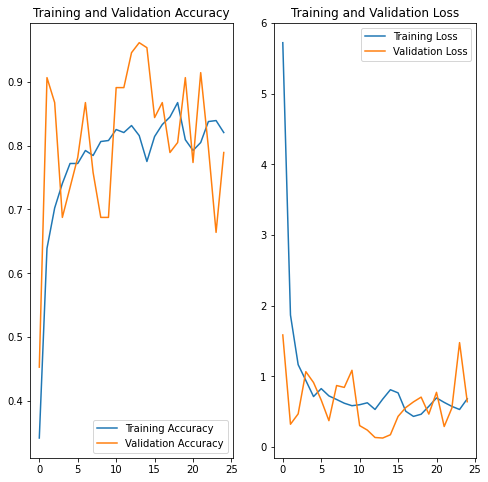

In [71]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [72]:
##################################################################################################
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [73]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)

['2D-S Other (OT)', 'Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Planar crystal (PC)', 'Quasi-sphere (QS)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


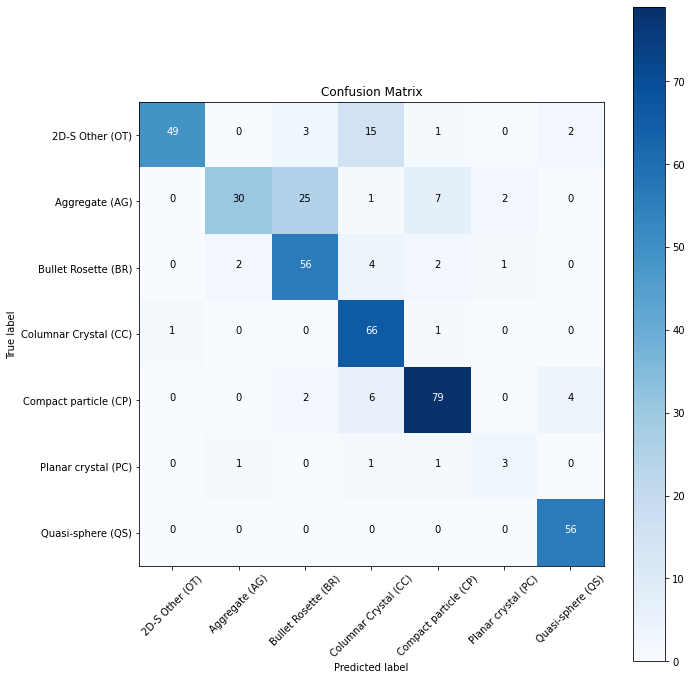

In [74]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [75]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.98      0.70      0.82        70
       Aggregate (AG)       0.91      0.46      0.61        65
  Bullet Rosette (BR)       0.65      0.86      0.74        65
Columnar Crystal (CC)       0.71      0.97      0.82        68
Compact particle (CP)       0.87      0.87      0.87        91
  Planar crystal (PC)       0.50      0.50      0.50         6
    Quasi-sphere (QS)       0.90      1.00      0.95        56

             accuracy                           0.81       421
            macro avg       0.79      0.77      0.76       421
         weighted avg       0.83      0.81      0.80       421



In [76]:
#Save the model
model.save("reset2DS1.hdf5")


Inception V3

In [77]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [78]:
# Import the InceptionV library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [79]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [82]:
prediction = Dense(7, activation='softmax')(x)

# create a model object
#model = Model(inputs=inception.input, outputs=prediction)

In [83]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [84]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [85]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 11s 424ms/step - loss: 1.8024 - accuracy: 0.6953 - val_loss: 2.9551 - val_accuracy: 0.4141
Epoch 2/25
20/20 [==============================] - 7s 370ms/step - loss: 0.6827 - accuracy: 0.8344 - val_loss: 0.9189 - val_accuracy: 0.7578
Epoch 3/25
20/20 [==============================] - 8s 394ms/step - loss: 0.6733 - accuracy: 0.8484 - val_loss: 0.6140 - val_accuracy: 0.8516
Epoch 4/25
20/20 [==============================] - 7s 360ms/step - loss: 0.5603 - accuracy: 0.8366 - val_loss: 0.8693 - val_accuracy: 0.7422
Epoch 5/25
20/20 [==============================] - 8s 377ms/step - loss: 0.7738 - accuracy: 0.7984 - val_loss: 0.4458 - val_accuracy: 0.8906
Epoch 6/25
20/20 [==============================] - 8s 374ms/step - loss: 0.6074 - accuracy: 0.8281 - val_loss: 0.4882 - val_accuracy: 0.8984
Epoch 7/25
20/20 [==============================] - 8s 409ms/step - loss: 0.6881 - accuracy: 0.8091 - val_loss: 0.9735 - val_accuracy: 0.7344
Epoch

In [86]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 87.41%
[INFO] Loss:  0.5702687501907349


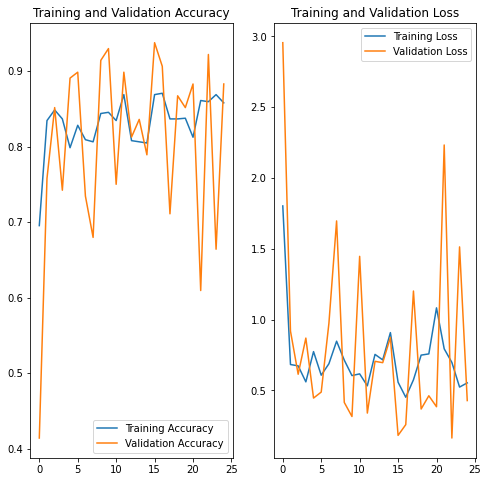

In [87]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [88]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [89]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

# print(target_names)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


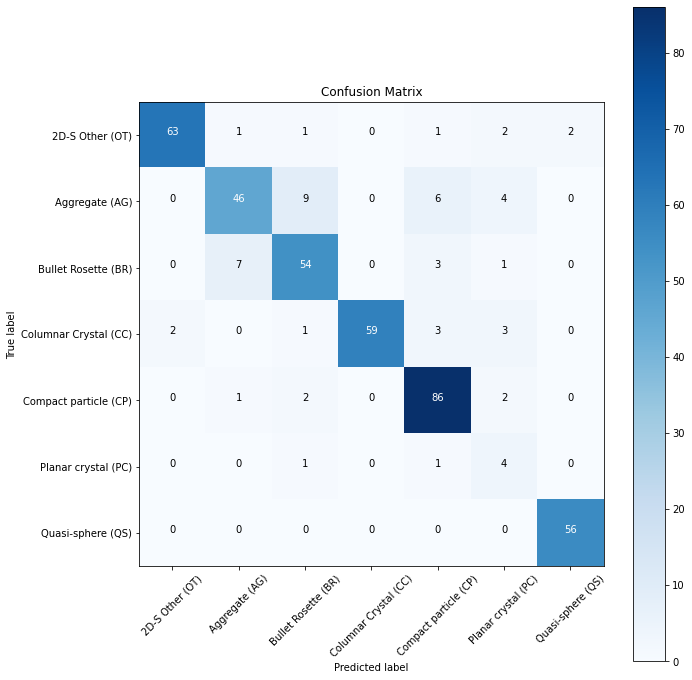

In [90]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [91]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.97      0.90      0.93        70
       Aggregate (AG)       0.84      0.71      0.77        65
  Bullet Rosette (BR)       0.79      0.83      0.81        65
Columnar Crystal (CC)       1.00      0.87      0.93        68
Compact particle (CP)       0.86      0.95      0.90        91
  Planar crystal (PC)       0.25      0.67      0.36         6
    Quasi-sphere (QS)       0.97      1.00      0.98        56

             accuracy                           0.87       421
            macro avg       0.81      0.85      0.81       421
         weighted avg       0.89      0.87      0.88       421



In [92]:
#Save the model
model.save("inception2DS1.hdf5")

EfficientNet

In [93]:
!pip install efficientnet==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.8 MB/s 


In [94]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
# import the tensorflow.keras version of efficientnet
from efficientnet import tfkeras as efficientnet
import matplotlib.pyplot as plt

In [95]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3

def create_model(image_input_shape):

    decay = 0.000001
    input_image = tf.keras.layers.Input(shape=image_input_shape)

#     x = Conv2D(16,(3,3),padding='same', activation='relu',kernel_regularizer=regularizers.l2(decay),
#                 activity_regularizer=regularizers.l2(decay))(input_image)
#     x = BatchNormalization()(x)
#     x = MaxPool2D(pool_size=(2, 2))(x)
#     x = Conv2D(16,(3,3),padding='same', activation='relu',kernel_regularizer=regularizers.l2(decay),
#                 activity_regularizer=regularizers.l2(decay))(x)
#     x = BatchNormalization()(x)
#     x = MaxPool2D(pool_size=(2, 2))(x)
#     x = Conv2D(32,(5,5),padding='same', activation='relu',kernel_regularizer=regularizers.l2(decay),
#                 activity_regularizer=regularizers.l2(decay))(x)
#     x = BatchNormalization()(x)
#     x = MaxPool2D(pool_size=(2, 2))(x)
#     x = Conv2D(32,(5,5),padding='same', activation='relu',kernel_regularizer=regularizers.l2(decay),
#                 activity_regularizer=regularizers.l2(decay))(x)
#     x = BatchNormalization()(x)
#     x = MaxPool2D(pool_size=(2, 2))(x)
    x = EfficientNetB3( weights='imagenet', include_top=False)(input_image)
    
    
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(7, activation ='softmax')(x)
    
    return tf.keras.models.Model(inputs=input_image, outputs=x)         


In [96]:
#model = get_model(input_shape=(224, 224, 3), num_classes=7)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [97]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 21s 818ms/step - loss: 1.2364 - accuracy: 0.8047 - val_loss: 1.0285 - val_accuracy: 0.7734
Epoch 2/25
20/20 [==============================] - 7s 377ms/step - loss: 1.0111 - accuracy: 0.8123 - val_loss: 0.5514 - val_accuracy: 0.8594
Epoch 3/25
20/20 [==============================] - 8s 374ms/step - loss: 0.8163 - accuracy: 0.8453 - val_loss: 0.7484 - val_accuracy: 0.8047
Epoch 4/25
20/20 [==============================] - 8s 378ms/step - loss: 0.4023 - accuracy: 0.8938 - val_loss: 0.3294 - val_accuracy: 0.9141
Epoch 5/25
20/20 [==============================] - 14s 710ms/step - loss: 0.3494 - accuracy: 0.8953 - val_loss: 1.0182 - val_accuracy: 0.7734
Epoch 6/25
20/20 [==============================] - 8s 374ms/step - loss: 0.7877 - accuracy: 0.8234 - val_loss: 1.9217 - val_accuracy: 0.6328
Epoch 7/25
20/20 [==============================] - 8s 416ms/step - loss: 0.4534 - accuracy: 0.8828 - val_loss: 0.6546 - val_accuracy: 0.8281
Epoc

In [98]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 86.94%
[INFO] Loss:  0.6492681503295898


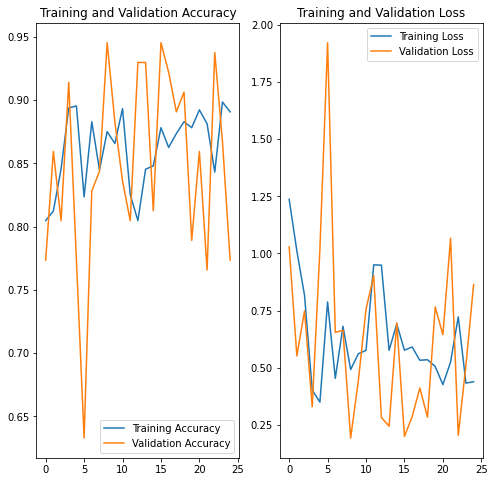

In [99]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [100]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

# print(target_names)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


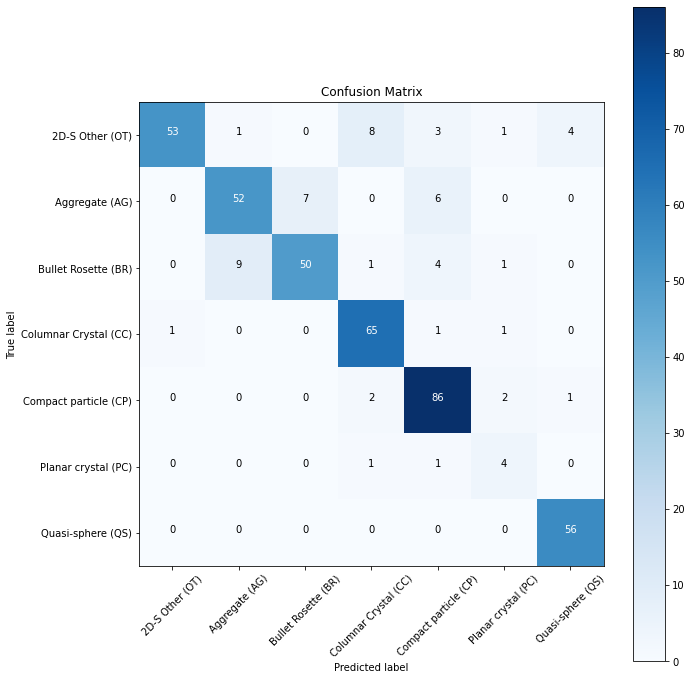

In [102]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [103]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.98      0.76      0.85        70
       Aggregate (AG)       0.84      0.80      0.82        65
  Bullet Rosette (BR)       0.88      0.77      0.82        65
Columnar Crystal (CC)       0.84      0.96      0.90        68
Compact particle (CP)       0.85      0.95      0.90        91
  Planar crystal (PC)       0.44      0.67      0.53         6
    Quasi-sphere (QS)       0.92      1.00      0.96        56

             accuracy                           0.87       421
            macro avg       0.82      0.84      0.83       421
         weighted avg       0.88      0.87      0.87       421



In [104]:
#Save the model
model.save("efficitent2DS1.hdf5")


Xception

In [105]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Sequential

In [106]:
# Define Input Parameters
shape = (224, 224)
channel = (3, )
input_size = shape + channel

#batch size
batch_size = 32

In [107]:
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

In [108]:
base_model = Xception(include_top=False, weights='imagenet', input_tensor=None, 
                      input_shape=input_size, pooling=max, classes=5,
                      classifier_activation='softmax')

# adding custom layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation = 'softmax'))

base_model.trainable = False

model.summary()

83697664/83683744 [==============================] - 3s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21,387,823
Trainable params: 526,343
Non-

In [109]:
#model = get_model(input_shape=(180, 180, 3), num_classes=5)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [110]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 12s 428ms/step - loss: 1.0438 - accuracy: 0.6391 - val_loss: 0.3376 - val_accuracy: 0.9375
Epoch 2/25
20/20 [==============================] - 8s 394ms/step - loss: 0.5626 - accuracy: 0.8297 - val_loss: 0.3296 - val_accuracy: 0.8750
Epoch 3/25
20/20 [==============================] - 8s 405ms/step - loss: 0.5338 - accuracy: 0.8317 - val_loss: 0.4310 - val_accuracy: 0.8516
Epoch 4/25
20/20 [==============================] - 8s 391ms/step - loss: 0.4522 - accuracy: 0.8375 - val_loss: 0.2962 - val_accuracy: 0.9062
Epoch 5/25
20/20 [==============================] - 9s 425ms/step - loss: 0.4550 - accuracy: 0.8594 - val_loss: 0.3913 - val_accuracy: 0.8828
Epoch 6/25
20/20 [==============================] - 8s 394ms/step - loss: 0.3468 - accuracy: 0.8656 - val_loss: 0.3719 - val_accuracy: 0.8828
Epoch 7/25
20/20 [==============================] - 8s 394ms/step - loss: 0.3449 - accuracy: 0.8672 - val_loss: 0.1772 - val_accuracy: 0.9375
Epoch

In [111]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 88.60%
[INFO] Loss:  0.2960447669029236


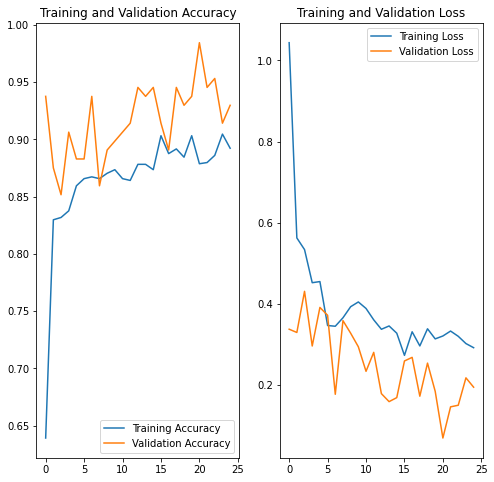

In [112]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [113]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [114]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

# print(target_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


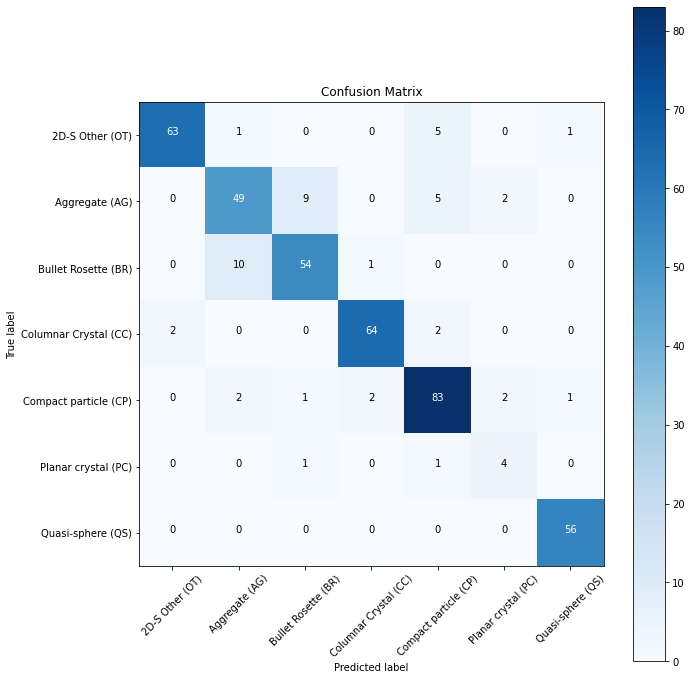

In [115]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [116]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.97      0.90      0.93        70
       Aggregate (AG)       0.79      0.75      0.77        65
  Bullet Rosette (BR)       0.83      0.83      0.83        65
Columnar Crystal (CC)       0.96      0.94      0.95        68
Compact particle (CP)       0.86      0.91      0.89        91
  Planar crystal (PC)       0.50      0.67      0.57         6
    Quasi-sphere (QS)       0.97      1.00      0.98        56

             accuracy                           0.89       421
            macro avg       0.84      0.86      0.85       421
         weighted avg       0.89      0.89      0.89       421



In [117]:
#Save the model
model.save("Xception2DS1.hdf5")
